In [64]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal
import matplotlib.mlab as mlab
%matplotlib inline

In [65]:
#Загрузка данных
ld = load_iris()
data = [[], [], []]
for index, el in enumerate(ld.data):
    data[ld.target[index]].append(el);
data = np.array(data)

In [66]:
# Оценим параметры распределений
a = [[0 for j in range(4)] for i in range(3)]
sig = [[[0 for j in range(4)] for i in range(4)] for e in range(3)]
for i in range(3):
    for j in range(4):
        a[i][j] = np.array([data[i][k][j] for k in range(len(data[i]))]).mean()
        for e in range(4):
            sig[i][j][e] = np.array(np.array([data[i][k][j]
                                        for k in range(len(data[i]))]) * np.array([data[i][k][e]
                                        for k in range(len(data[i]))])).mean() - np.array([data[i][k][j]
                                        for k in range(len(data[i]))]).mean() * np.array([data[i][k][e]
                                        for k in range(len(data[i]))]).mean()

In [67]:
#Пары координат из условия
coord_pairs = [[0, 1], [1, 3], [2, 3]]
#Функция, находящая плотность через проекцию
def f1(aim, coord):
    left = -1
    right = 8
    #Создаем сетку
    gr = np.mgrid[left:right:0.05, left:right:0.05]
    #Создаем массивы точек из выборки
    out_x = [data[aim][i][coord[0]] 
             for i in range(len(data[aim]))]
    out_y = [data[aim][i][coord[1]] 
             for i in range(len(data[aim]))]
    #Генерируем плотность по сетке от распределения с нужными параметрами
    z = np.array([[sts.multivariate_normal.pdf(
                        (gr[0, i, j], gr[1, i, j]), 
                        mean=[a[aim][coord[0]], a[aim][coord[1]]], 
                        cov=[[sig[aim][coord[0]][coord[0]], sig[aim][coord[0]][coord[1]]], 
                             [sig[aim][coord[1]][coord[0]], sig[aim][coord[1]][coord[1]]]])
                    for i in range(gr[0].shape[0])]
                    for j in range(gr[0].shape[1])])
    #Строим график
    fig = plt.figure(figsize = (15, 10))
    fig.gca()
    plt.title(r'coordinates - $' + str(coord) + r'$, k - $' + str(aim) + r'$')
    plt.contour(gr[1], gr[0], z)
    plt.plot(out_x, out_y, '+', color = 'red') #отметим точки "+", чтобы не нагромождать рисунки
    plt.show()

Построим 9 графиков и различными параметрами:

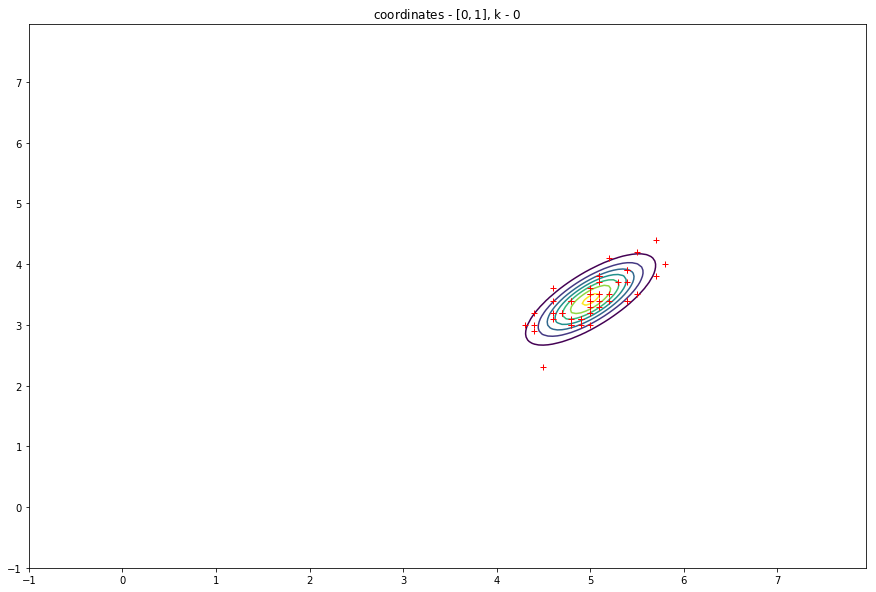

In [68]:
f1(0, coord_pairs[0])

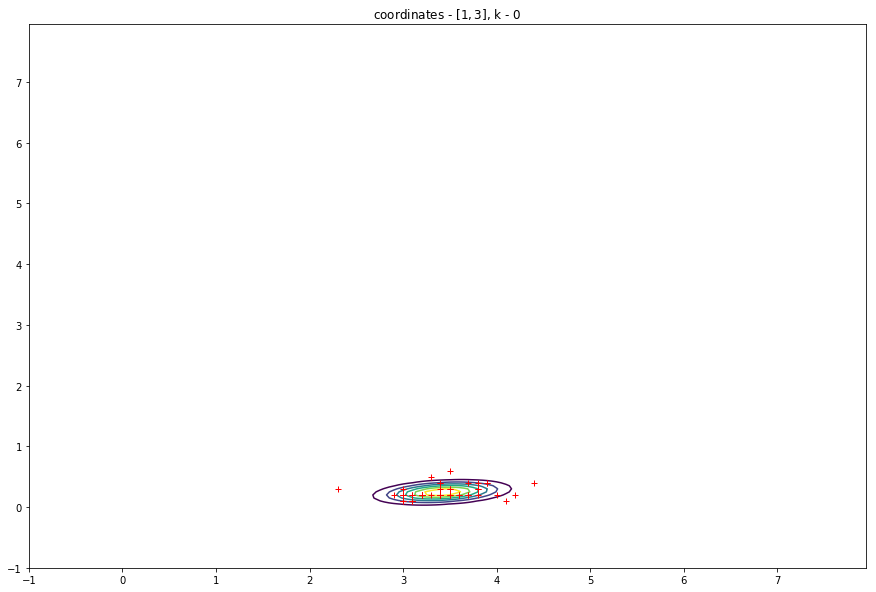

In [69]:
f1(0, coord_pairs[1])

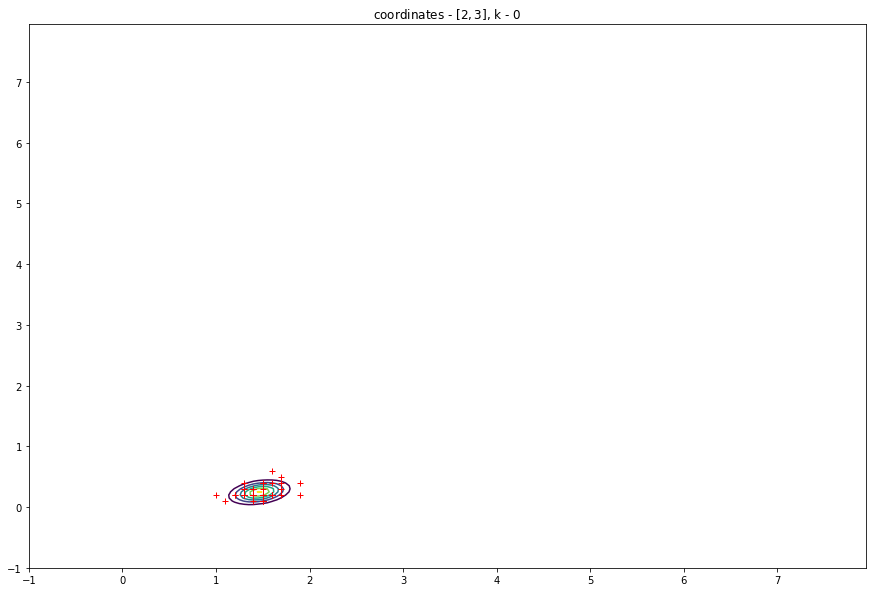

In [70]:
f1(0, coord_pairs[2])

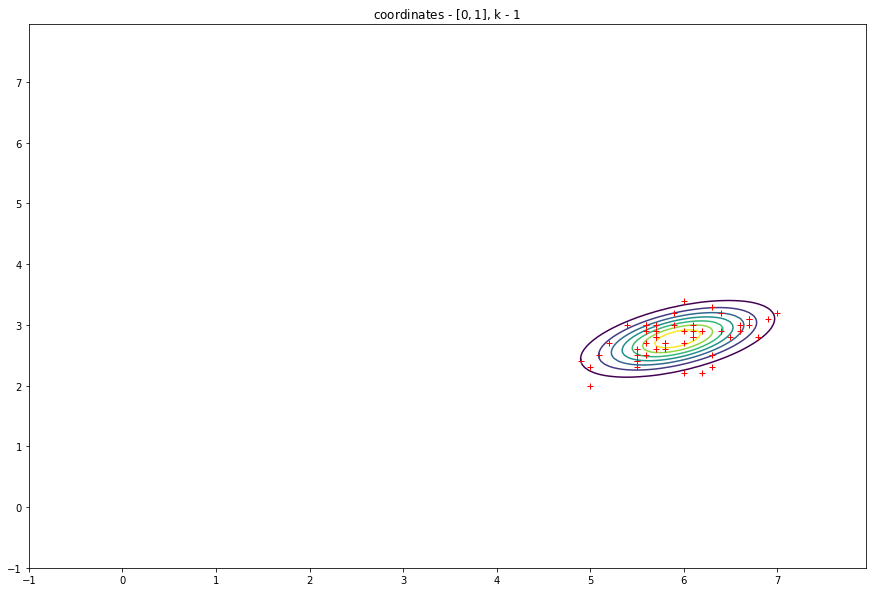

In [71]:
f1(1, coord_pairs[0])

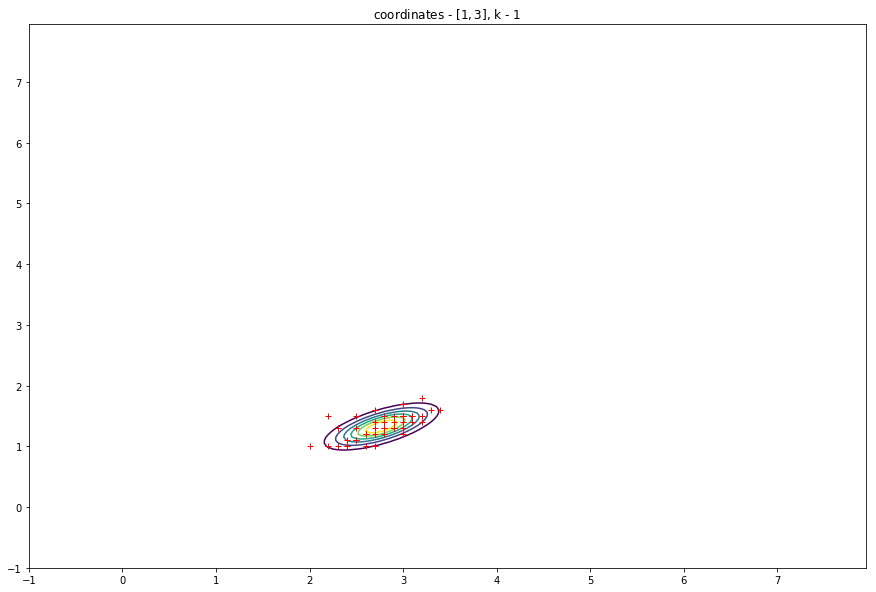

In [72]:
f1(1, coord_pairs[1])

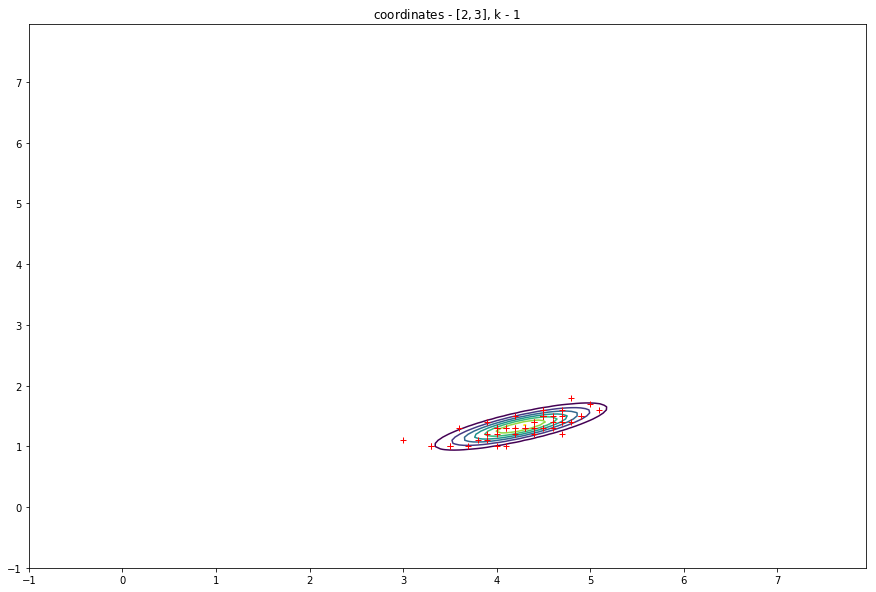

In [73]:
f1(1, coord_pairs[2])

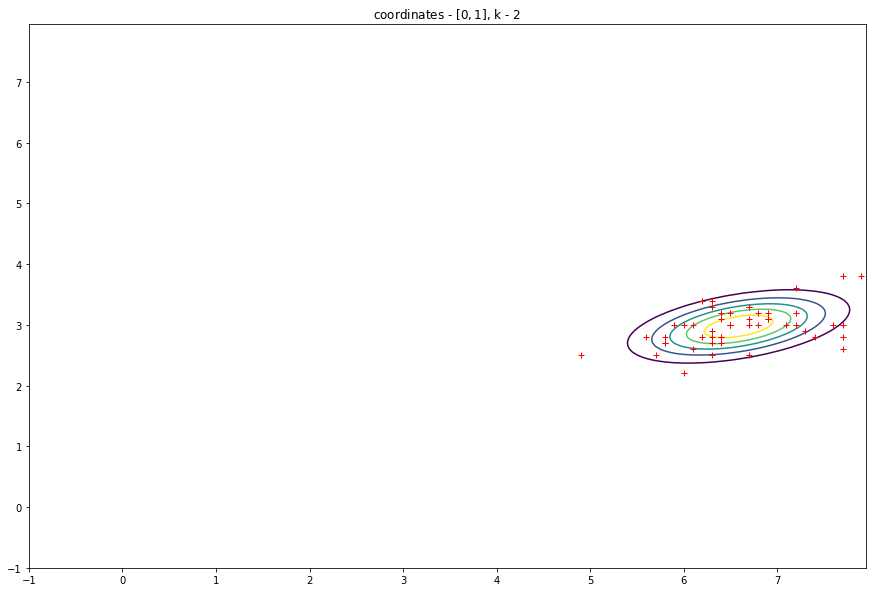

In [74]:
f1(2, coord_pairs[0])

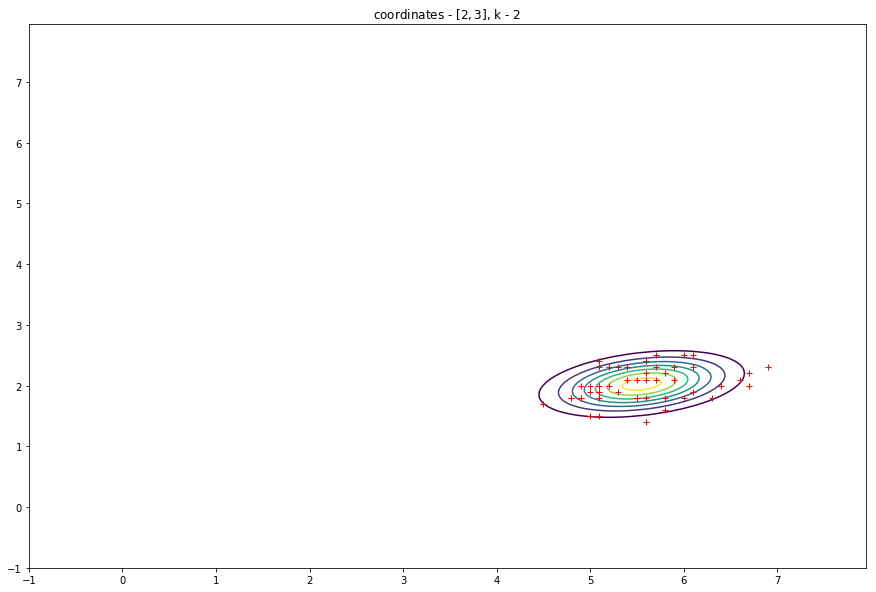

In [75]:
f1(2, coord_pairs[2])

## Оценим вероятности $P(T=k)$:

In [76]:
total_size = 0
for i in range(3):
    total_size += len(data[i])
for i in range(3):
    print("P(T = %d) =" % i, (len(data[i]) / total_size))

('P(T = 0) =', 0)
('P(T = 1) =', 0)
('P(T = 2) =', 0)


Выходит, что вектора из разных наборов встречаются с равной вероятностью

Теперь посчитаем условные матожидания $E(X \mid T \neq k)$:

In [77]:
exp = [[0 for i in range(4)] for j in range(3)]
for i in range(3):
    for j in range(4):
        exp[i][j] = ((np.array([data[(i + 1) % 3][k][j] 
                        for k in range(len(data[(i + 1) % 3]))]).mean()) / 2) + ((np.array([data[(i + 2) % 3][k][j] 
                        for k in range(len(data[(i + 2) % 3]))]).mean()) / 2)
for i  in range(3):
    print('P(X|T != %d) = ' % i, 
          '(%.3f, ' % exp[i][0], 
          '%.3f, ' % exp[i][1], 
          '%.3f, ' % exp[i][2], 
          '%.3f)' % exp[i][3])

('P(X|T != 0) = ', '(6.262, ', '2.872, ', '4.906, ', '1.676)')
('P(X|T != 1) = ', '(5.797, ', '3.196, ', '3.508, ', '1.135)')
('P(X|T != 2) = ', '(5.471, ', '3.094, ', '2.862, ', '0.785)')


Построим графики условных плотностей $p_{(X \mid I(T \neq k))}(x \mid 1)$ для тех же пар координат, что и раньше и $k=0,1,2$

In [85]:
def cnt_pdf(gr, aim, coord):
    new_a = (np.array(a[(aim + 1) % 3]) + np.array(a[(aim + 2) % 3])) / 2
    new_sig = (np.array(sig[(aim + 1) % 3]) + np.array(sig[(aim + 2) % 3])) / 4
    return np.array([[sts.multivariate_normal.pdf(
                        (gr[0, i, j], gr[1, i, j]), 
                        mean=[new_a[coord[0]], 
                              new_a[coord[1]]], 
                        cov=[[new_sig[coord[0]][coord[0]], new_sig[coord[0]][coord[1]]], 
                             [new_sig[coord[1]][coord[0]], new_sig[coord[1]][coord[1]]]])
                    for i in range(gr[0].shape[0])]
                    for j in range(gr[0].shape[1])])

def f2(aim, coord): #Условная плотность
    left = -1
    right = 8
    #Создаем сетку
    gr = np.mgrid[left:right:0.05, left:right:0.05]
    #Генерируем плотность по сетке от распределения с нужными параметрами
    z = cnt_pdf(gr, aim, coord)
    #Строим график
    fig = plt.figure(figsize = (15, 10))
    fig.gca()
    plt.title(r'coordinates - $' + str(coord) + r'$, k - $' + str(aim) + r'$')
    plt.contour(gr[1], gr[0], z)
    plt.show()

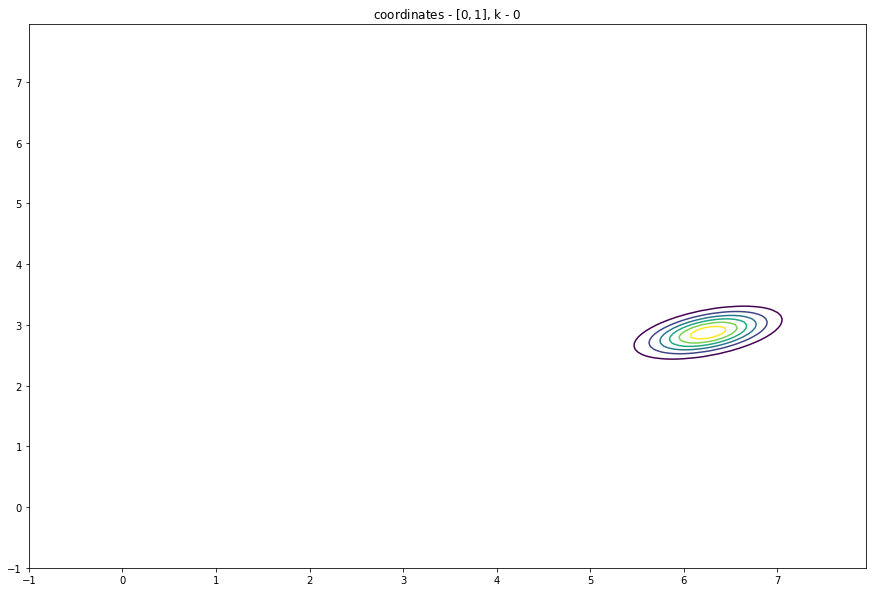

In [86]:
f2(0, coord_pairs[0])

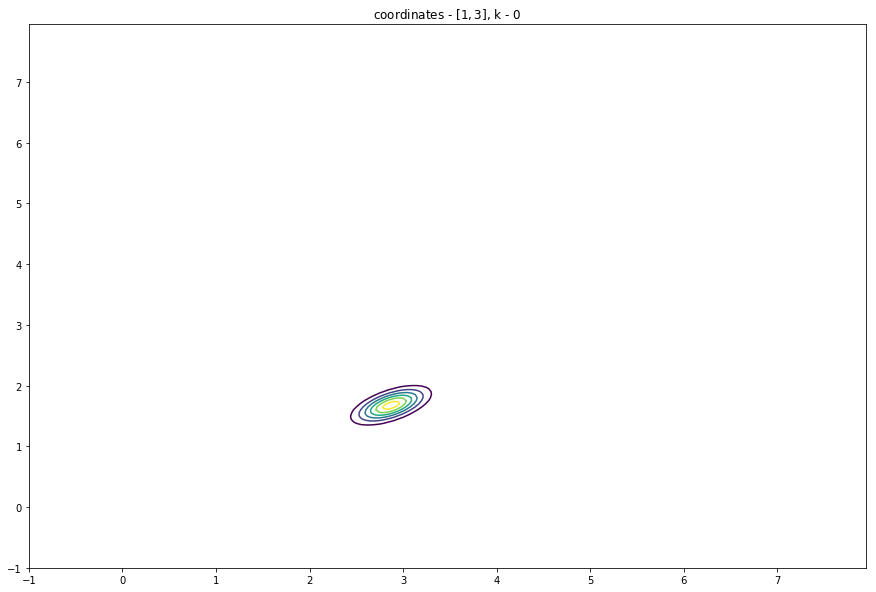

In [88]:
f2(0, coord_pairs[1])

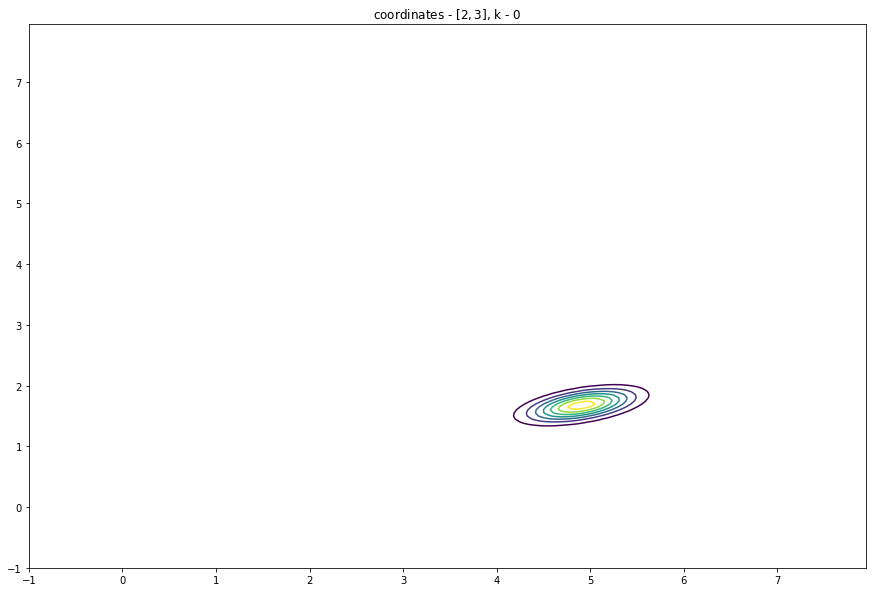

In [89]:
f2(0, coord_pairs[2])

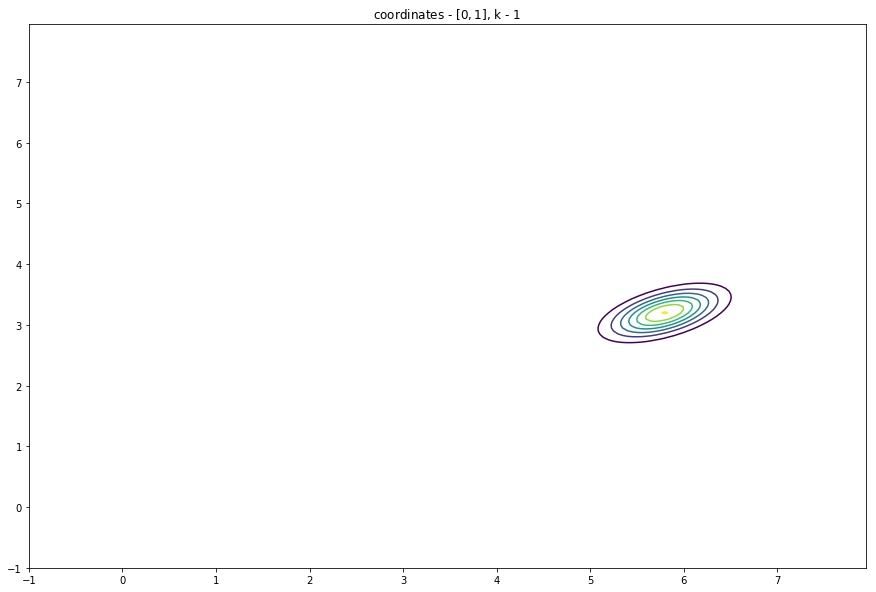

In [90]:
f2(1, coord_pairs[0])

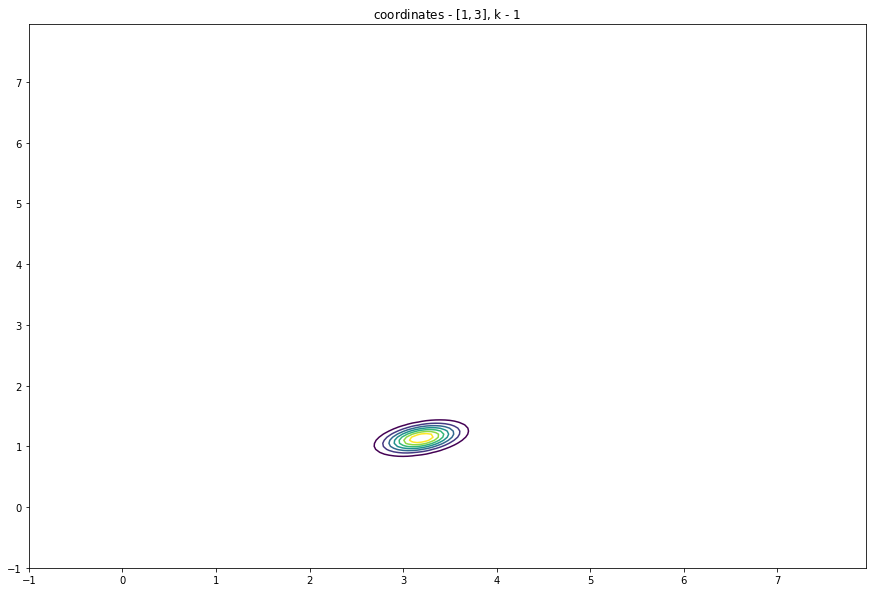

In [91]:
f2(1, coord_pairs[1])

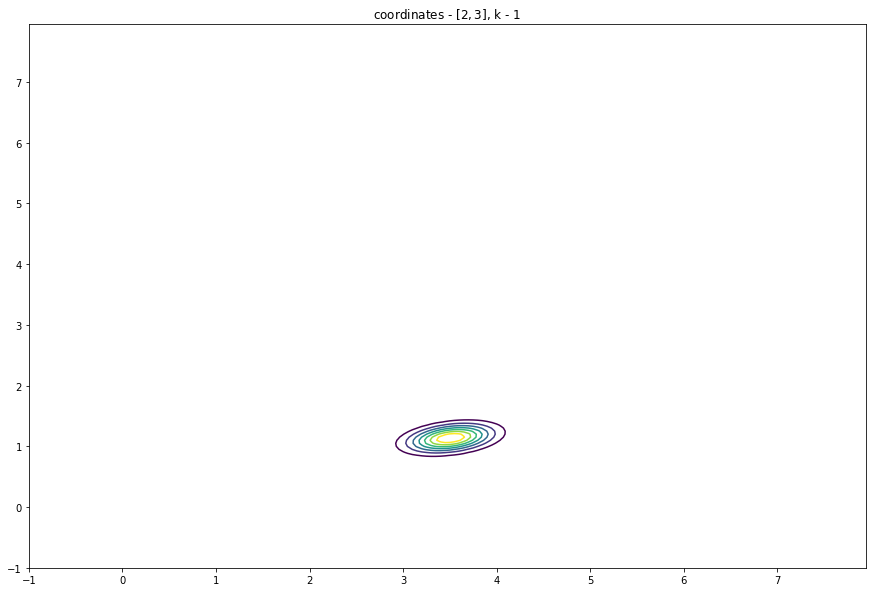

In [92]:
f2(1, coord_pairs[2])

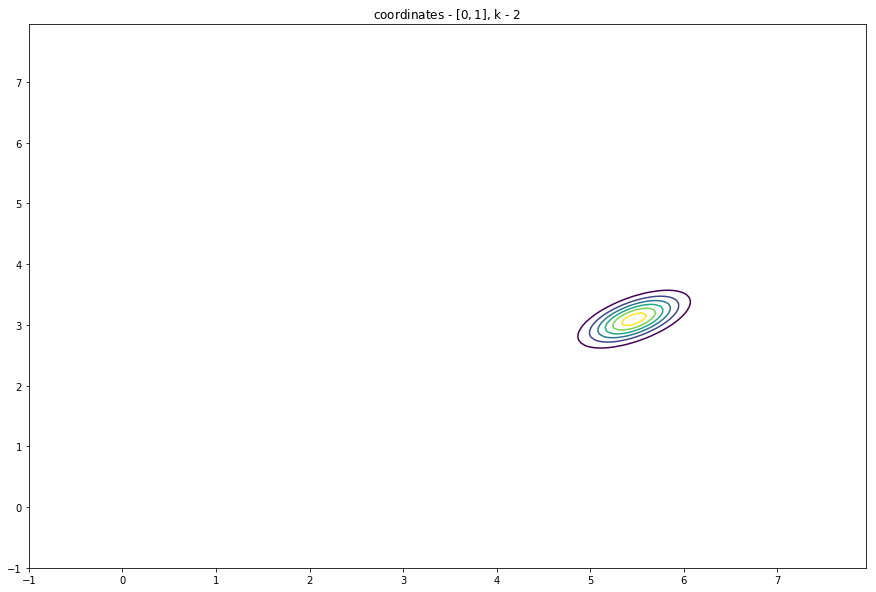

In [93]:
f2(2, coord_pairs[0])

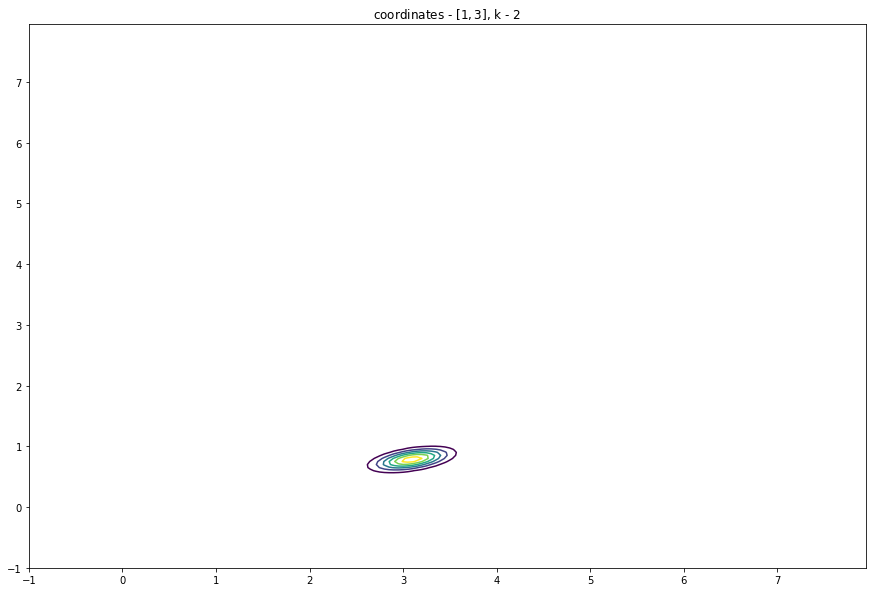

In [94]:
f2(2, coord_pairs[1])

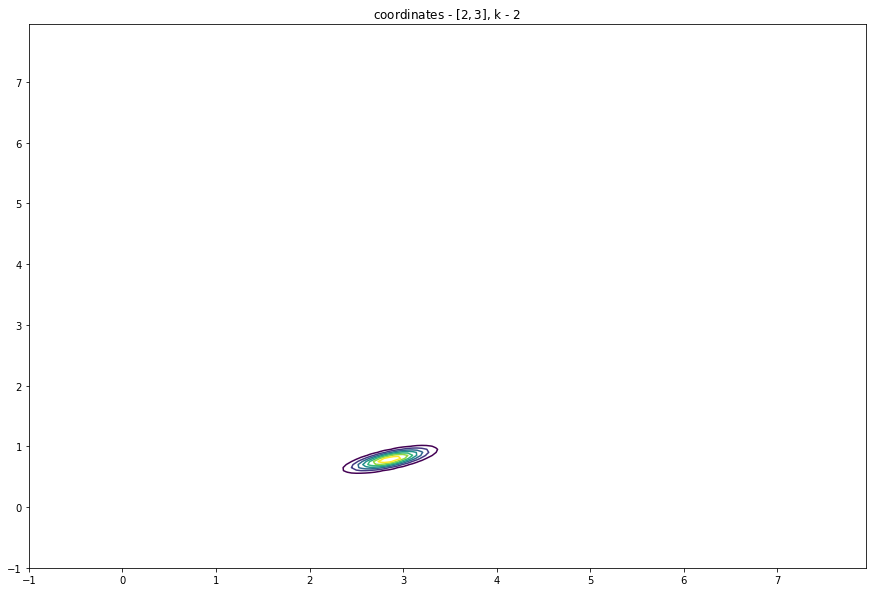

In [95]:
f2(2, coord_pairs[2])

Теперь проклассифицируем всё пространство по принципу $k = \underset{k}{argmax}(p_{(X \mid I(T=k))}(x \mid 1))$ и нарисуем соответствующие графики:

In [96]:
def classify_points(x, y, coord):
    result = [0, 0, 0]
    for i in range(3):
        result[i] = sts.multivariate_normal.pdf(
                        (x, y), 
                        mean=[a[i][coord[0]], a[i][coord[1]]], 
                        cov=[[sig[i][coord[0]][coord[0]], sig[i][coord[0]][coord[1]]], 
                             [sig[i][coord[1]][coord[0]], sig[i][coord[1]][coord[1]]]])
    return np.argmax(result)

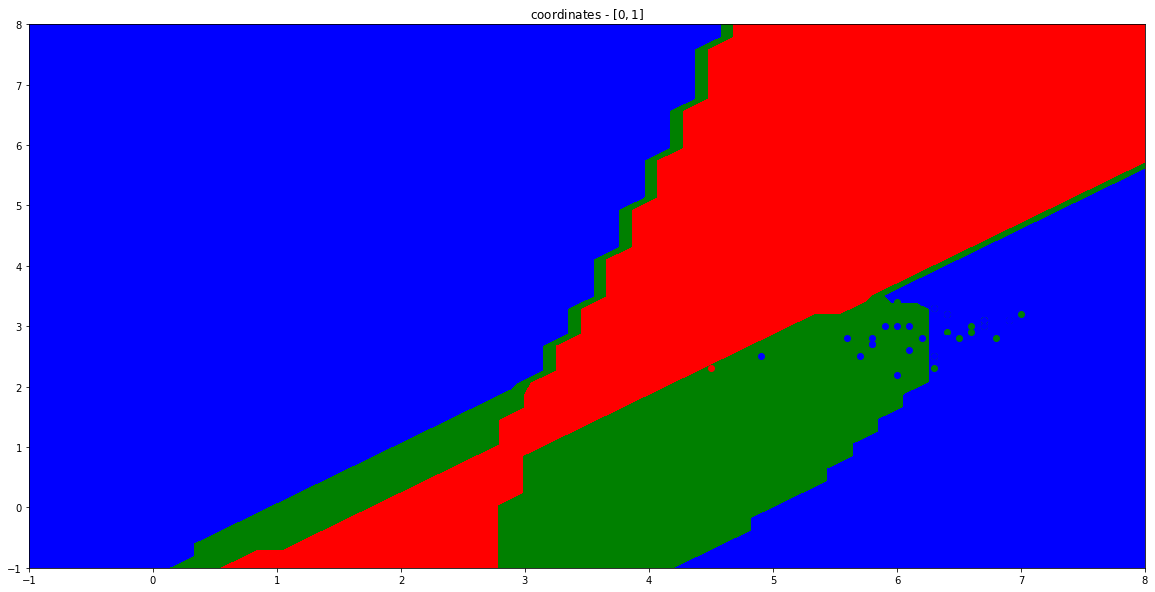

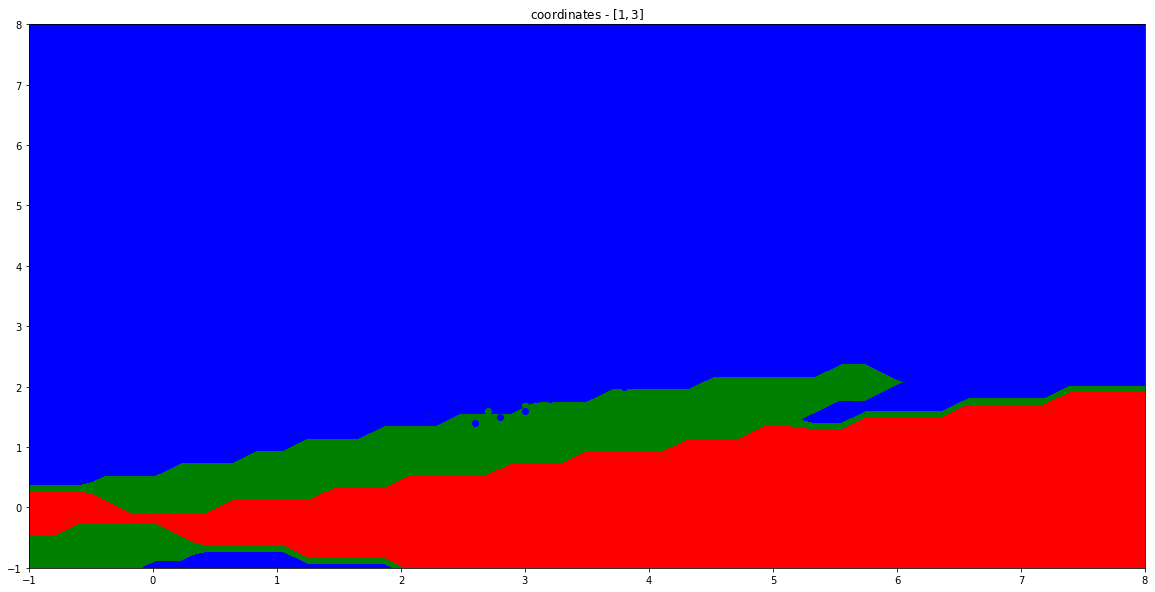

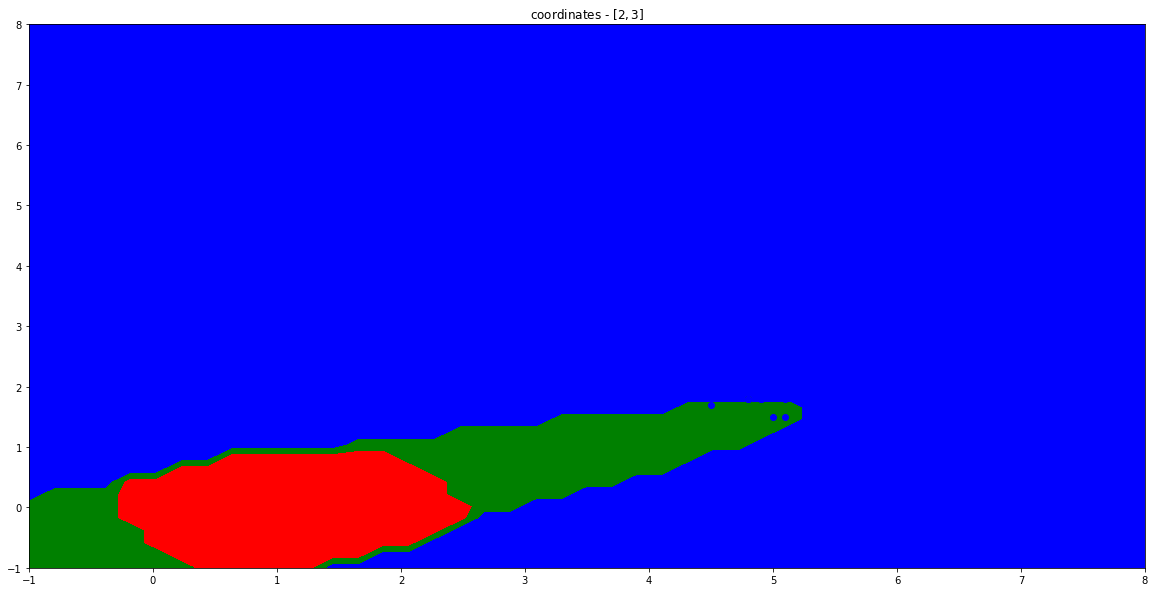

In [97]:
for coords in range(3):
    fig = plt.figure(figsize = (20, 10))
    ax = fig.gca()
    left = -1
    right = 8
    x = np.linspace(left, right, 45)
    y = np.linspace(left, right, 45)
    z = [[0 for i in range(len(x))] for j in range(len(y))]
    for i in range(len(y)):
        for j in range(len(x)):
            z[i][j] = classify_points(x[j], y[i], coord_pairs[coords])

    plt.contourf(x, y, z, levels=[-0.5, 0.5, 1.5, 2.5], colors=('r', 'g', 'b'))

    types = ['or', 'og', 'ob']
    for aim in range(3):
        out_x = [data[aim][i][coord_pairs[coords][0]] 
                 for i in range(len(data[aim]))]
        out_y = [data[aim][i][coord_pairs[coords][1]] 
                 for i in range(len(data[aim]))]
        plt.plot(out_x, out_y, types[aim])
    l = plt.title(r'coordinates - $' + str(coord_pairs[coords]) + '$')

    ax.set_xlim(left, right)
    ax.set_ylim(left, right)
    plt.show()